In [257]:
import pandas as pd
import matplotlib.pyplot as plt

In [258]:
data = pd.read_csv('Assignment 2/problem_2/problem_2_train.csv')
data.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,AN,7,500004,233,233,131,A,ADLD,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9
3,2838589,AM,2,110018,233,233,228,B,ADLD,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9
4,2855214,AN,21,110015,233,233,131,A,ADLD,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8


# As we can see, mobmake, custpincodecategory,claimtype are in string format, We first map them to the integer format so that they can be fed to the model.

In [259]:
vals = list(data.mobmake.unique())
vals

['AN',
 'AJ',
 'AM',
 'C',
 'AI',
 'AD',
 'S',
 'AA',
 'Y',
 'AE',
 'D',
 'U',
 'AB',
 'T',
 'AF',
 'G',
 'L',
 'H',
 'K',
 'J',
 'N',
 'AP',
 'AK',
 'O',
 'F',
 'AL',
 'R',
 'M',
 'Z',
 'P',
 'I',
 'V',
 'AR',
 'W',
 'AG',
 'B',
 'A',
 'AO']

In [234]:
Mobmapping = {k: v for v, k in enumerate(vals)}
data.replace({'mobmake': Mobmapping},inplace=True)

In [235]:
vals = list(data.custpincodecategory.unique())

In [236]:
CustPinCodemapping = {k: v for v, k in enumerate(vals)}
data.replace({'custpincodecategory':CustPinCodemapping},inplace = True)

In [237]:
data.claimtype.value_counts()

ADLD    6246
EW         4
Name: claimtype, dtype: int64

In [238]:
ewval = (data.loc[data.claimtype == 'EW']['tat_in_days'].mean())/4
adldval = (data.loc[data.claimtype == 'ADLD']['tat_in_days'].mean())/6200
ClaimTypemapping = {'ADLD':adldval,'EW':ewval}
data.replace({'claimtype':ClaimTypemapping},inplace=True)

# Now we check for the presence of any null values.

In [239]:
data.isna().sum()

srno                   0
mobmake                0
hubid                  0
hubpincode             0
pickuppartnerid        0
deliverypartnerid      0
insuranceCompanyId     0
custpincodecategory    0
claimtype              0
custpincode            0
memcreateddate         0
mobilepurchasedate     0
claimintdate           0
servicecntrid          0
pickupStartdate        0
tat_in_days            0
dtype: int64

# Now we need to analyse which columns we need to analyse which columns are of importance and which columns are of no use.

# waste columns = srno, hubpincode, custpincode,memcreatedate, mobilepurchasedate,insurancecompanyId
### 1.As sno has unique values
### 2.hubpincode and custpincode importance has been covered in hubid and custpincodecategory
### 3.I tried to find relation among the dates that have been given but difference between any of  the dates is not making sense so I have decided not to use them to train the model
# useful = mobmake, deliverypartnerid,, pickuppartnerid,hubid,servicecntrid
# notsure = customerpincodecategory,claimtype,relation between claimdate and pickupstartdate
## Not sure about the claimtype because there are only 4 cases of extended warranty and all others are of ADLD

In [240]:
X = data[['mobmake','hubid','pickuppartnerid','servicecntrid']]
y = data.tat_in_days
X.head()

,mobmake,hubid,pickuppartnerid,servicecntrid
0,0,7,233,4403
1,1,10,233,4444
2,1,2,233,4388
3,2,2,233,4092
4,0,21,233,4580


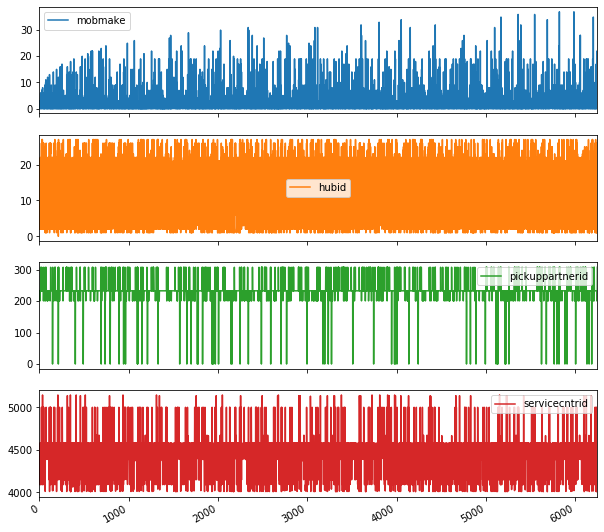

In [241]:
X.plot(figsize=(10,10),subplots  = True)
plt.show()

# This plot shows the outlier values, as we can see some of the values for pickuppartnerid is 0,therefore we can map the 0 values to a nearer value like 100, to make a confined range.

In [242]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1)

In [243]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import SGDRegressor
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor

In [244]:
model = LinearRegression()
model.fit(X_train,y_train)
ans = model.predict(X_test)
np.sqrt(metrics.mean_squared_error(ans,y_test))

5.0691795496883225

In [245]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
ans = model.predict(X_test)
np.sqrt(metrics.mean_squared_error(ans,y_test))

5.062721785687201

In [246]:
modelgb = GradientBoostingRegressor()
modelgb.fit(X_train,y_train)
ans = modelgb.predict(X_test)
np.sqrt(metrics.mean_squared_error(ans,y_test))

4.836679538254518

In [247]:
poly = PolynomialFeatures(degree = 3) 
X_poly = poly.fit_transform(X_train) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y_train) 
ans = lin2.predict(poly.fit_transform(X_test)) 
np.sqrt(metrics.mean_squared_error(ans,y_test))

5.0658599209817226

In [248]:
data.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,0,7,500004,233,233,131,0,0.002052,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,2838330,1,10,226010,233,233,131,0,0.002052,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,2835781,1,2,110018,233,233,228,0,0.002052,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9
3,2838589,2,2,110018,233,233,228,1,0.002052,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9
4,2855214,0,21,110015,233,233,131,0,0.002052,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8


In [249]:
data.custpincodecategory.value_counts()

0    4020
1    1346
2     554
3     186
4     144
Name: custpincodecategory, dtype: int64

# Applyting after feature scaling and then running all of the cells above

In [250]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Now applying the model on test values

In [277]:
testdata = pd.read_csv('Assignment 2/problem_2/problem_2_test.csv')

In [278]:
testdata.head()
Mobmapping['AC'] = 38
Mobmapping['AH'] = 39
Mobmapping['Q'] = 40

In [279]:
testdata.replace({'mobmake': Mobmapping,'custpincodecategory':CustPinCodemapping,'claimtype':ClaimTypemapping},inplace=True)

In [280]:
Xtest = testdata[['mobmake','hubid','pickuppartnerid','servicecntrid']]

In [281]:
testdata.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate
0,2829088,0,3,560011,233,233,131,0,0.002052,560093,2017-07-30,2017-07-27,2018-02-01,4467,2018-02-06
1,2829866,1,2,110018,233,233,228,0,0.002052,110034,2017-07-17,2017-01-25,2018-02-01,4388,2018-02-08
2,2894489,1,3,560011,233,233,228,2,0.002052,590014,2018-01-12,2018-01-11,2018-02-21,4460,2018-02-28
3,2876708,1,2,110018,233,233,228,1,0.002052,250110,2017-08-07,2017-05-21,2018-02-16,4388,2018-02-26
4,2890283,0,22,400104,233,233,131,2,0.002052,496001,2017-11-10,2017-09-22,2018-02-20,4581,2018-02-23


In [284]:
ans = modelgb.predict(Xtest)
print(ans)

[10.16931131 12.38005914  9.66155075 ... 16.52523917 12.46924742
 13.31426474]


In [287]:
testdata['tat_in_days'] = ans

In [288]:
testdata.to_csv('Problem2Solution.csv')